In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import metrics

Text(0.5, 1.0, 'Data Image(img2)')

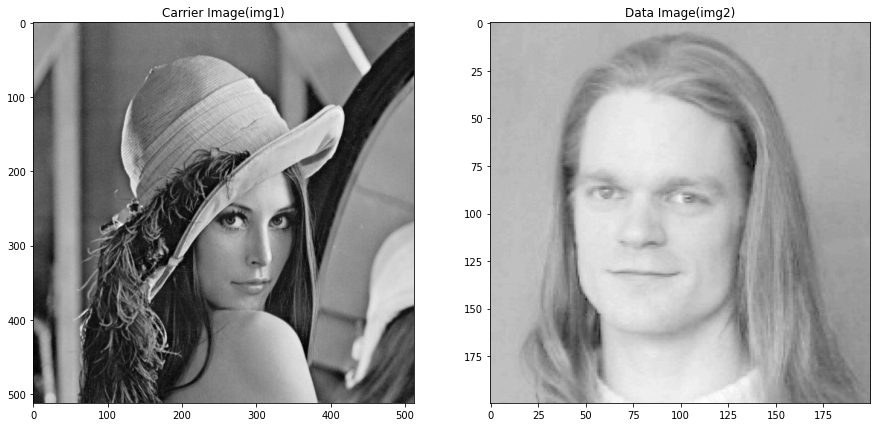

In [2]:
path=r'D:/Study/Python/openCV/College/res/'
img1= cv2.imread(path+'lena.tif',0)
img2 =cv2.imread(path+'low.png',0)
# img1=cv2.resize(img1,(5,5))
img2=cv2.resize(img2,(200,200))
# print(img1)
# print(img2)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img1,'gray')
plt.title('Carrier Image(img1)')
plt.subplot(1,2,2)
plt.imshow(img2,'gray')
plt.title('Data Image(img2)')

In [3]:
img2_flat=img2.flatten()
msg=""
for i in range (img2.shape[0]*img2.shape[1]):
    msg+=format(img2_flat[i],'08b')
msg_copy=msg+'0000000'

In [4]:
diff_arr=[]# 
flat=[]
flat_copy=[]
for i in range(img1.shape[0]):
    if(i%2==0):
        for j in range (img1.shape[1]):
            flat.append(img1[i][j])
            flat_copy.append(img1[i][j])
    else:
        for j in range (img1.shape[1]-1,-1,-1):
            flat.append(img1[i][j])
            flat_copy.append(img1[i][j])

t=int(len(flat)/2)
for i in range(t):
    diff_arr.append(abs(int(flat[(i*2)+1])-int(flat[(i*2)])))
# print(flat)
# print(diff_arr)


In [5]:
#Encryption
num=0
i=0
while i<len(diff_arr) and num<len(msg):
    if(diff_arr[i]<8):
        temp=int(msg_copy[num:num+3],2)
        d=temp
        num+=3

    elif(diff_arr[i]<16 and diff_arr[i]>7):
        temp=int(msg_copy[num:num+3],2)
        d=8+temp
        num+=3
    elif(diff_arr[i]>15 and diff_arr[i]<32):
        temp=int(msg_copy[num:num+4],2)
        d=16+temp
        num+=4
    elif(diff_arr[i]>31 and diff_arr[i]<64):
        temp=int(msg_copy[num:num+5],2)
        d=32+temp
        num+=5
    elif(diff_arr[i]>63 and diff_arr[i]<128):
        temp=int(msg_copy[num:num+6],2)
        d=64+temp
        num+=6
    elif(diff_arr[i]>127 and diff_arr[i]<256):
        temp=int(msg_copy[num:num+7],2)
        d=128+temp
        num+=7

    if(flat[2*i]>=flat[2*i +1] and d>diff_arr[i]):
        flat[2*i]+=math.ceil(abs(d-diff_arr[i])/2)
        flat[2*i +1]-=math.floor(abs(d-diff_arr[i])/2)
    elif(flat[2*i]<flat[2*i +1] and d>diff_arr[i]):
        flat[2*i]-=math.ceil(abs(d-diff_arr[i])/2)
        flat[2*i +1]+=math.floor(abs(d-diff_arr[i])/2)
    elif(flat[2*i]>=flat[2*i +1] and d<=diff_arr[i]):
        flat[2*i]-=math.ceil(abs(d-diff_arr[i])/2)
        flat[2*i +1]+=math.floor(abs(d-diff_arr[i])/2)
    elif(flat[2*i]<flat[2*i +1] and d<=diff_arr[i]):
        flat[2*i]+=math.ceil(abs(d-diff_arr[i])/2)
        flat[2*i +1]-=math.floor(abs(d-diff_arr[i])/2)

    
    i+=1


In [6]:
carrier_img= np.zeros((img1.shape[0],img1.shape[1]),np.uint8)
index=0
for i in range(img1.shape[0]):
    if(i%2==0):
        for j in range (img1.shape[1]):
            carrier_img[i][j]=flat[index]
            index+=1
    else:
        for j in range (img1.shape[1]-1,-1,-1):
            carrier_img[i][j]=flat[index]
            index+=1
print(carrier_img)

[[165 159 165 ... 167 155 128]
 [159 166 164 ... 168 157 126]
 [164 161 164 ... 168 157 126]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


Text(0.5, 1.0, 'Actual Carrier Image(carrier_img)')

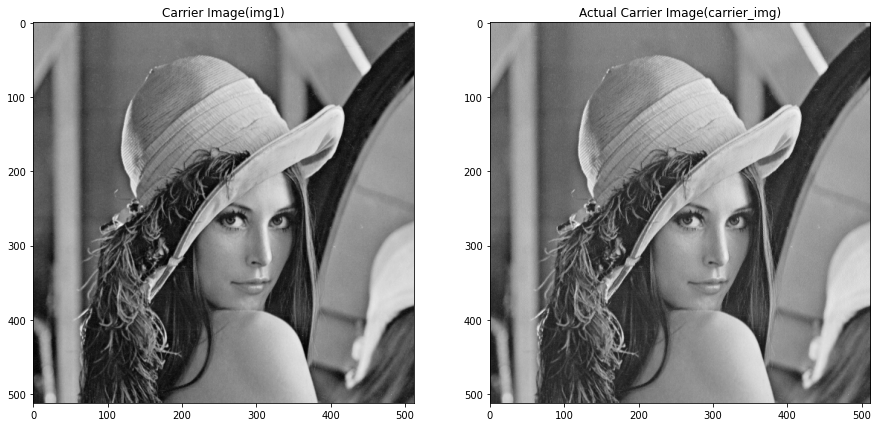

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img1,'gray')
plt.title('Carrier Image(img1)')
plt.subplot(1,2,2)
plt.imshow(carrier_img,'gray')
plt.title('Actual Carrier Image(carrier_img)')

In [8]:
#Decryption

flat_carr=[]
for i in range(img1.shape[0]):
    if(i%2==0):
        for j in range (img1.shape[1]):
            flat_carr.append(carrier_img[i][j])
    else:
        for j in range (img1.shape[1]-1,-1,-1):
            flat_carr.append(carrier_img[i][j])

# print(flat_carr)

In [9]:
msg_dec=""
i=0
while i<len(flat_carr) and len(msg_dec)<=len(msg):
    temp=abs(int(flat_carr[i+1])-int(flat_carr[i]))
    if(temp<8):
        s=format(temp,'03b')
        msg_dec+=s
    if(temp<16 and temp>7):
        temp-=8
        s=format(temp,'03b')
        msg_dec+=s
    elif(temp>15 and temp<32):
        temp-=16
        s=format(temp,'04b')
        msg_dec+=s
    elif(temp>31 and temp<64):
        temp-=32
        s=format(temp,'05b')
        msg_dec+=s
    elif(temp>63 and temp<128):
        temp-=64
        s=format(temp,'06b')
        msg_dec+=s
    elif(temp>127 and temp<256):
        temp-=128
        s=format(temp,'07b')
        msg_dec+=s

    i+=2

# print(msg_dec)

In [10]:
resultant_data_img= np.zeros((img2.shape[0],img2.shape[1]),'uint8')
num=0
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        resultant_data_img[i][j]=int(msg_dec[num:num+8],2)
        num+=8
print(resultant_data_img)

[[221 221 221 ... 219 219 219]
 [221 220 221 ... 219 219 219]
 [221 221 221 ... 219 220 219]
 ...
 [227 227 227 ... 208 206 207]
 [226 227 227 ... 207 206 207]
 [225 227 227 ... 207 207 208]]


In [11]:
print("Carrier Image: ")
print("MSE: ",metrics.mean_squared_error(img1,carrier_img))
print("PSNR: ",metrics.peak_signal_noise_ratio(img1,carrier_img))
print("SSIM: ",metrics.structural_similarity(img1,carrier_img))
print("Data Image: ")
print("MSE: ",metrics.mean_squared_error(img2,resultant_data_img))
print("PSNR: ",metrics.peak_signal_noise_ratio(img2,resultant_data_img))
print("SSIM: ",metrics.structural_similarity(img2,resultant_data_img))

Carrier Image: 
MSE:  4.722789764404297
PSNR:  41.3888174753582
SSIM:  0.9789326781904765
Data Image: 
MSE:  0.0
PSNR:  inf
SSIM:  1.0


Text(0.5, 1.0, 'Data image after Encryption')

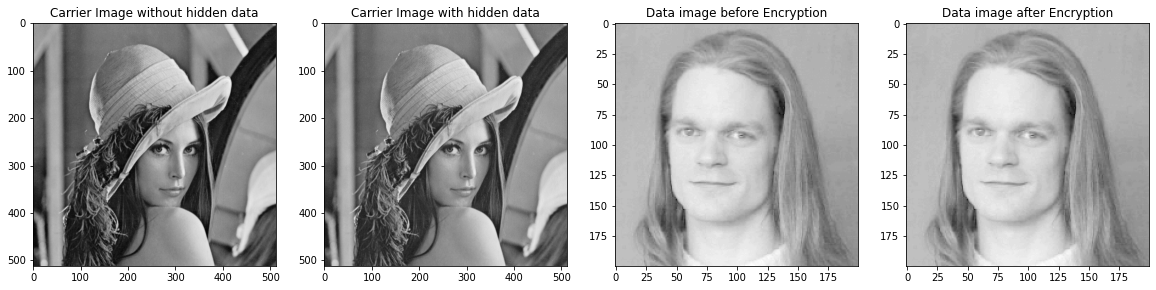

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img1,'gray')
plt.title('Carrier Image without hidden data')
plt.subplot(1,4,2)
plt.imshow(carrier_img,'gray')
plt.title('Carrier Image with hidden data')
plt.subplot(1,4,3)
plt.imshow(img2,'gray')
plt.title('Data image before Encryption')
plt.subplot(1,4,4)
plt.imshow(resultant_data_img,'gray')
plt.title('Data image after Encryption')